<a href="https://colab.research.google.com/github/Dcodinginsane/mlproject1/blob/main/wind_enery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

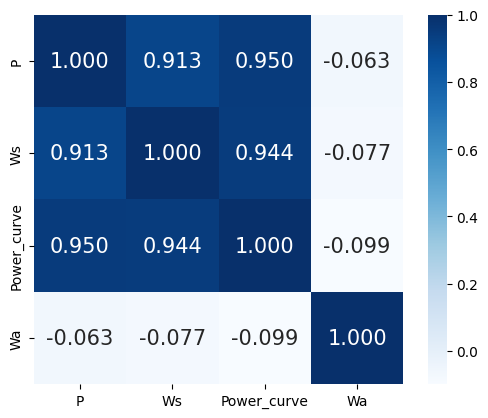

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# read data
data = pd.read_csv('/content/T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)
cols = ['P', 'Ws', 'Power_curve', 'Wa']

# build the matrix
correlation_matrix = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(correlation_matrix,
                 cbar=True, annot=True, square=True, fmt='.3f',
                 annot_kws={'size': 15},
                 cmap='Blues',
                 yticklabels=['P', 'Ws', 'Power_curve', 'Wa'],
                 xticklabels=['P', 'Ws', 'Power_curve', 'Wa'])

# save the figure
plt.savefig('image.png', dpi=600, bbox_inches='tight')
plt.show()

### Scatterplot matrix `sns.pairplot`

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

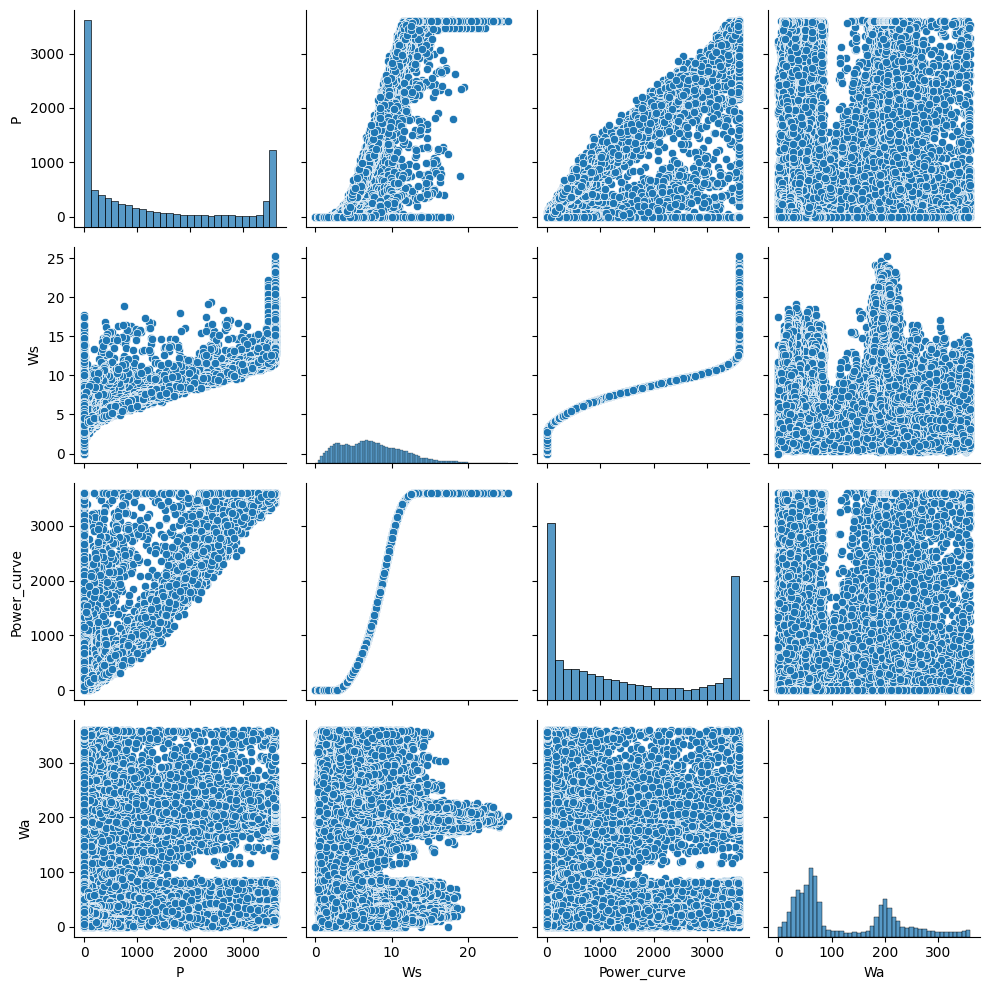

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# read data
data = pd.read_csv('T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)
cols = ['P', 'Ws', 'Power_curve', 'Wa']

# build the matrix
sns.pairplot(data[cols], height=2.5)
plt.tight_layout()

# save the figure
plt.savefig('image2.png', dpi=600, bbox_inches='tight')
plt.show()

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

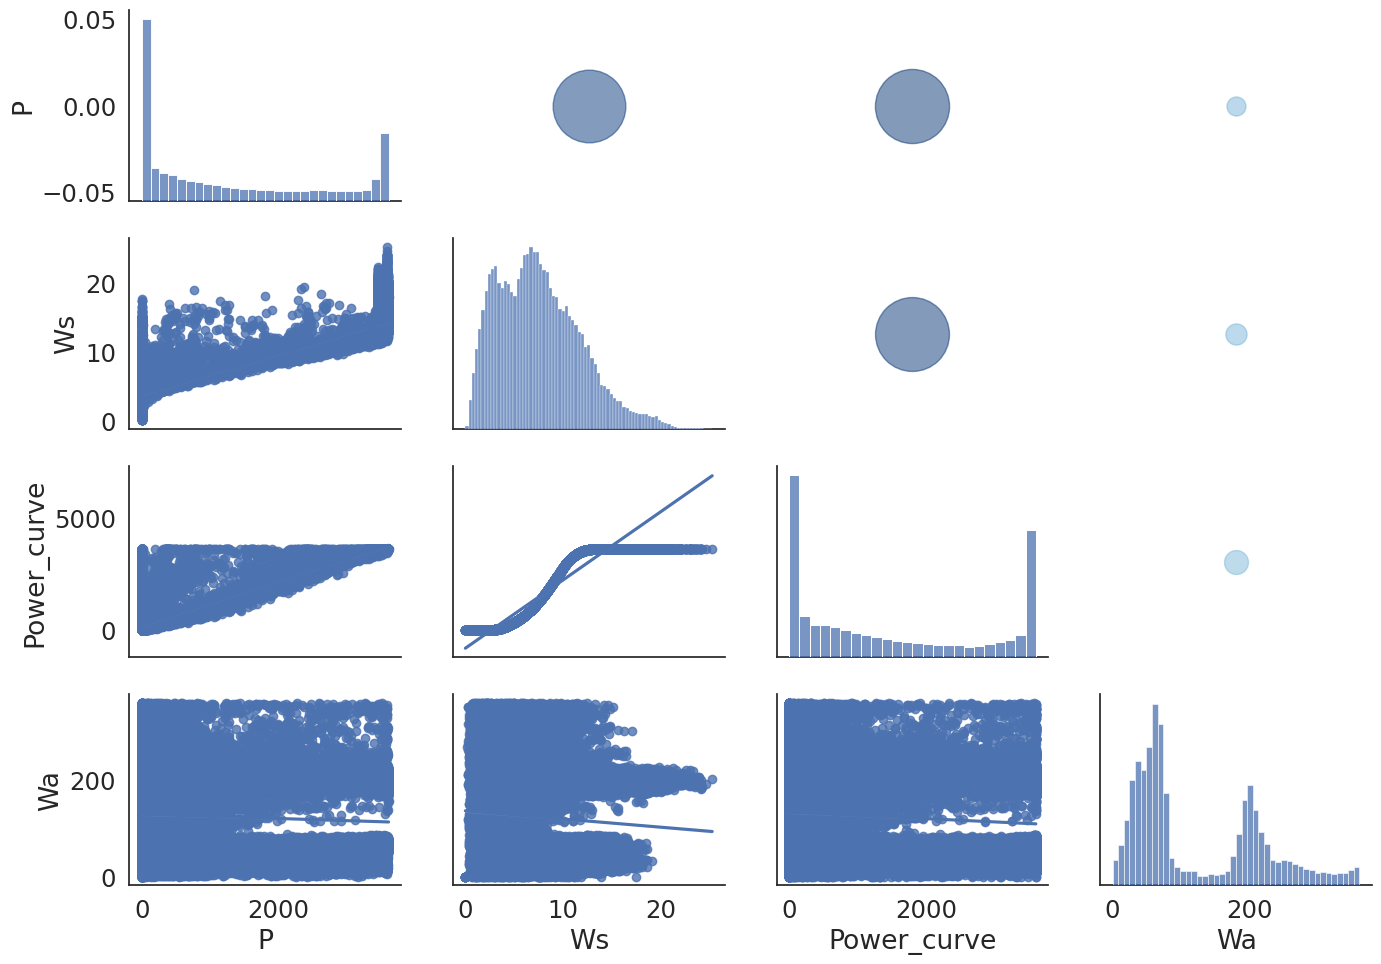

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data
data = pd.read_csv('T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)
cols = ['P', 'Ws', 'Power_curve', 'Wa']

# buid the matrix
def correlation_dots(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 3000
    ax.scatter([.5], [.5], marker_size,
               [corr_r], alpha=0.5,
               cmap = 'Blues',
               vmin = -1, vmax = 1,
               transform = ax.transAxes)
    font_size = abs(corr_r) * 40 + 5

sns.set(style = 'white', font_scale = 1.6)
fig = sns.PairGrid(data, aspect = 1.4, diag_sharey = False)
fig.map_lower(sns.regplot)
fig.map_diag(sns.histplot)
fig.map_upper(correlation_dots)

# save the figure
plt.savefig('image3.jpg', dpi = 600, bbox_inches = 'tight')
plt.show()

### Tip 2: Use the functionality of the visualization library to its fullest

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

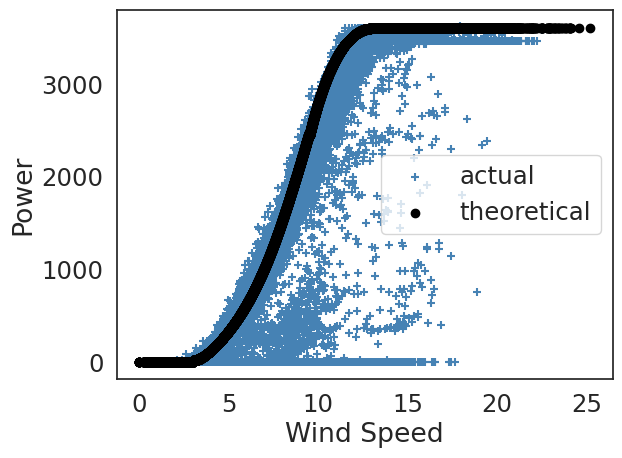

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
data = pd.read_csv('T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)

# build the plot
plt.scatter(data['Ws'], data['P'], color='steelblue', marker='+', label='actual')
plt.scatter(data['Ws'], data['Power_curve'], color='black', label='theoretical')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend(loc='best')

# save the figure
plt.savefig('image4.png', dpi=600, bbox_inches='tight')
plt.show()

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

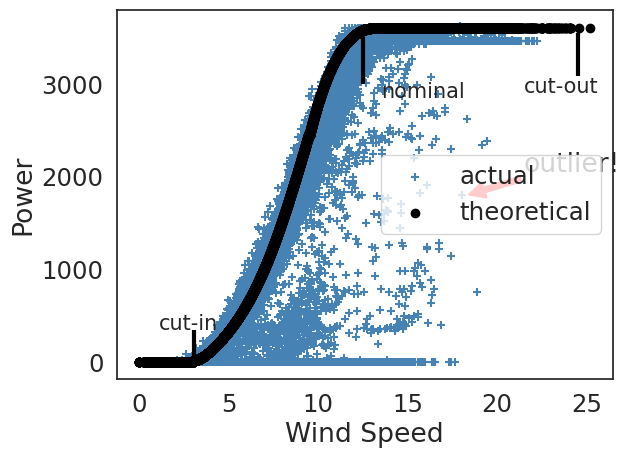

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
data = pd.read_csv('T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)

# build the plot
plt.scatter(data['Ws'], data['P'], color='steelblue', marker='+', label='actual')
plt.scatter(data['Ws'], data['Power_curve'], color='black', label='theoretical')

# add vertical lines, text notes and arrow
plt.vlines(x=3.05, ymin=10, ymax=350, lw=3, color='black')
plt.text(1.1, 355, r"cut-in", fontsize=15)
plt.vlines(x=12.5, ymin=3000, ymax=3500, lw=3, color='black')
plt.text(13.5, 2850, r"nominal", fontsize=15)
plt.vlines(x=24.5, ymin=3080, ymax=3550, lw=3, color='black')
plt.text(21.5, 2900, r"cut-out", fontsize=15)
plt.annotate('outlier!', xy=(18.4,1805), xytext=(21.5,2050),
            arrowprops={'color':'red'})

plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend(loc='best')

# save the figure
plt.savefig('image4_2.png', dpi=600, bbox_inches='tight')
plt.show()

### Tip 3: Always find a faster way of making the same stuff

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

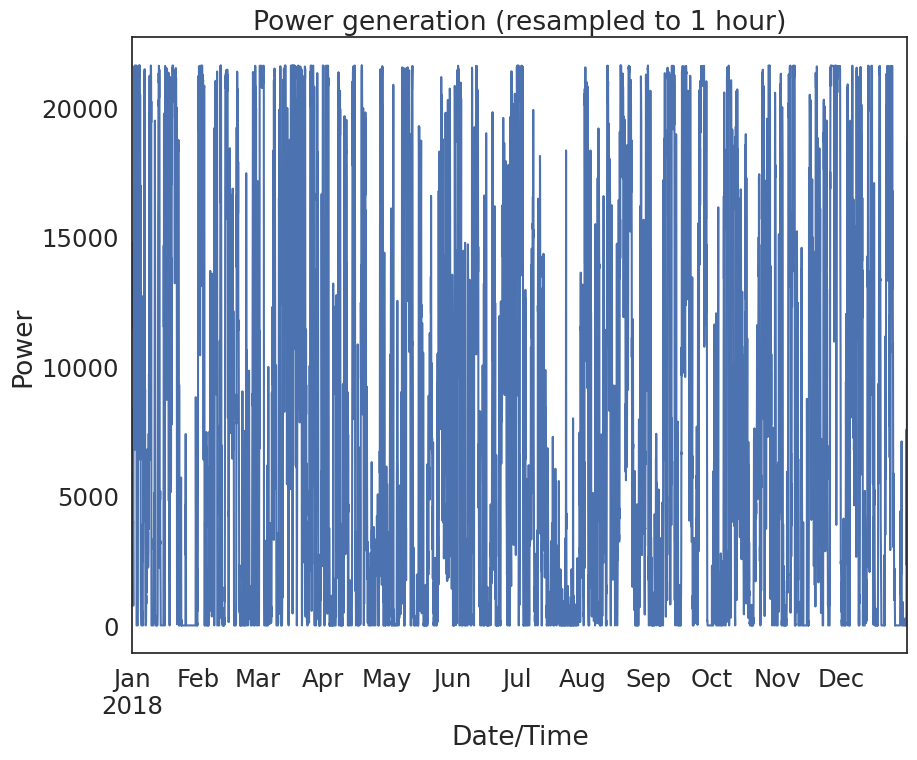

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
data = pd.read_csv('T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)

# resample 10-min data into hourly time measurements
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
fig = plt.figure(figsize=(10,8))
group_data = (data.set_index('Date/Time')).resample('H')['P'].sum()

# plot wind power dynamics
group_data.plot(kind='line')
plt.ylabel('Power')
plt.xlabel('Date/Time')
plt.title('Power generation (resampled to 1 hour)')

# save the figure
plt.savefig('wind_power.png', dpi=600, bbox_inches='tight')
plt.show()

A windrose, or a polar rose plot, is a special diagram for representing the distribution of meteorological data, typically wind speeds by direction [3]. There is a simple module windrose for the matplotlib library, which allows to easily build this sort of visualizations, e.g.:

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

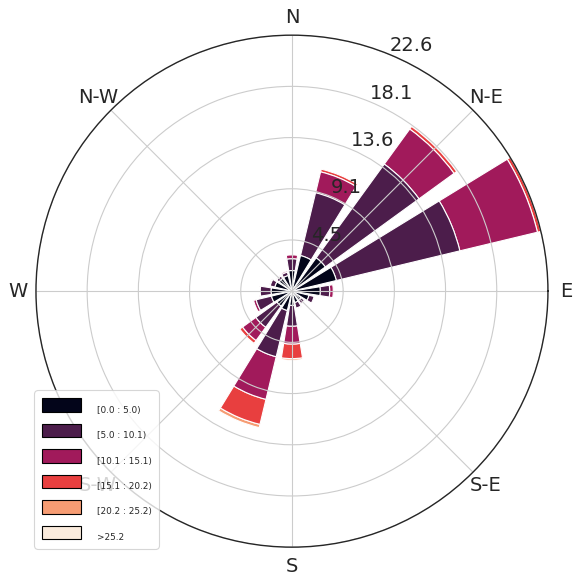

In [8]:
!pip install windrose

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes

# read data
data = pd.read_csv('T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)
wd  = data['Wa']
ws = data['Ws']

# plot normalized wind rose in a form of a stacked histogram
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# save the figure
plt.savefig('windrose.png', dpi = 600, bbox_inches = 'tight')
plt.show()

              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645904          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  
2                         390.

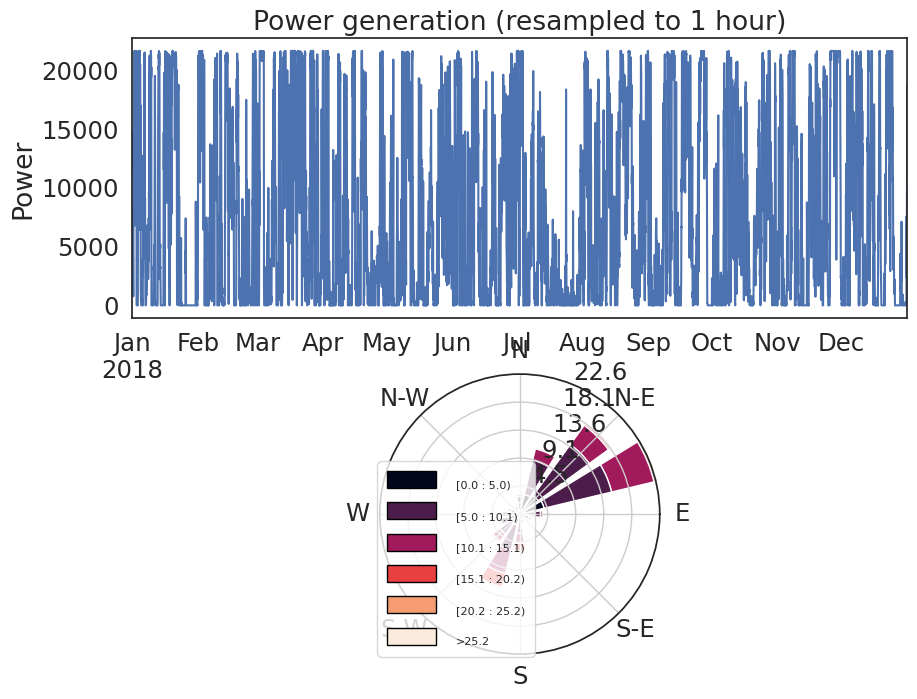

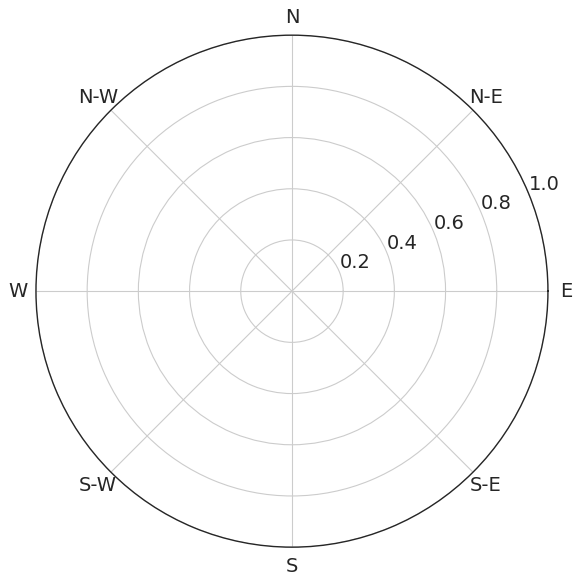

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes

# read data
data = pd.read_csv('T1.csv')
print(data)

# rename columns to make their titles shorter
data.rename(columns={'LV ActivePower (kW)':'P',
                     'Wind Speed (m/s)':'Ws',
                     'Theoretical_Power_Curve (KWh)':'Power_curve',
                     'Wind Direction (°)': 'Wa'},inplace=True)
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

fig = plt.figure(figsize=(10,8))

# plot both plots as subplots
ax1 = fig.add_subplot(211)
group_data = (data.set_index('Date/Time')).resample('H')['P'].sum()
group_data.plot(kind='line')
ax1.set_ylabel('Power')
ax1.set_xlabel('Date/Time')
ax1.set_title('Power generation (resampled to 1 hour)')

ax2 = fig.add_subplot(212, projection='windrose')

wd  = data['Wa']
ws = data['Ws']

ax = WindroseAxes.from_ax()
ax2.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax2.set_legend()

# save the figure
plt.savefig('image5.png', dpi=600, bbox_inches='tight')
plt.show()

In [13]:
!pip install PIL
import numpy as np

import PIL
from PIL import Image

# list images that needs to be merged
list_im = ['wind_power.png','windrose.png']
imgs = [PIL.Image.open(i) for i in list_im]

# resize all images to match the smallest
min_shape = sorted([(np.sum(i.size), i.size) for i in imgs])[0][1]

# for a vertical stacking - we use vstack
images_comb = np.vstack((np.asarray(i.resize(min_shape)) for i in imgs))
images_comb = PIL.Image.fromarray(imgs_comb)

# save the figure
imgages_comb.save('image5_2.png', dpi=(600,600))

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


<ipython-input-13-97336dfb91b1>:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  images_comb = np.vstack((np.asarray(i.resize(min_shape)) for i in imgs))


TypeError: ignored

In [12]:
import numpy as np
import PIL
from PIL import Image

list_im = ['image4.png','image4_2.png']
imgs = [PIL.Image.open(i) for i in list_im]

# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted([(np.sum(i.size), i.size) for i in imgs])[0][1]

imgs_comb = np.hstack((np.asarray(i.resize(min_shape)) for i in imgs))
### save that beautiful picture
imgs_comb = PIL.Image.fromarray(imgs_comb)
imgs_comb.save('image4_merged.png', dpi=(600,600))

<ipython-input-12-a237b848fbfc>:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack((np.asarray(i.resize(min_shape)) for i in imgs))
